In [1]:

TRAIN_PATH = "C:/Users/TAREESH/Desktop/covid/CovidDataset-20200427T133042Z-001/CovidDataset/Train"
VAL_PATH = "C:/Users/TAREESH/Desktop/covid/CovidDataset-20200427T133042Z-001/CovidDataset/Val"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [3]:
#Building CNN based model in keras
#we will be building 3/4 CNN layers followed by classification layers

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (224,224,3))) #32 number of filters -> we use 3X3 as it is standard
#So 1stly we are puting our convolutional layer with 32 number of filters we are keeping the no of filters 
#as small in the begining because the lower layers detect features in very small part of the image 
#32 filters = 32 feature Extractors
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#adding drop out to find over fitting
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
#in output layer we will be having only one neuron which performs binary classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy, optimizer = 'adam', metrics = ['accuracy'])
#adam - is a default choice used for optimising ; we do gradient decent optimiser for adam

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [5]:
#train from scratch
#we will use the keras image data generator library to make the data ready for the model



train_datagen = image.ImageDataGenerator( # we will do some augmentation on the image as well
    rescale = 1./255, # rescale the data by the factor of 1/255 which will help us to do the normalization
    shear_range = 0.2,
    zoom_range = 0.2, #shear and zoom will allow us to take some random crops from the drainages and 
                      #those will be like you are zooming into some part of image and the magnitude is around 20%
    horizontal_flip = True
    
)




test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator =  train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'             
)
#224 image size

Found 224 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [8]:
validation_generator = test_dataset.flow_from_directory(
    VAL_PATH,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'  
)


Found 60 images belonging to 2 classes.


In [9]:
# now we here going to train the model
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 200,
    validation_data = validation_generator,
    validation_steps = 2
)

C:\Users\TAREESH\AppData\Local\Temp/ipykernel_3616/2593354632.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/200
8/8 [==============================] - 221s 26s/step - loss: 2.2977 - accuracy: 0.5223 - val_loss: 0.6793 - val_accuracy: 0.5000


In [10]:
model.save("model_adv.h5")
model.evaluate_generator(train_generator)
model.evaluate_generator(validation_generator)

C:\Users\TAREESH\AppData\Local\Temp/ipykernel_3616/3153451632.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)
C:\Users\TAREESH\AppData\Local\Temp/ipykernel_3616/3153451632.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.6792684197425842, 0.5]

In [11]:
model = load_model("model_adv.h5")

In [12]:
import os
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [13]:
y_actual = []
y_test = []

In [14]:
for i in os.listdir("C:/Users/TAREESH/Desktop/covid/CovidDataset-20200427T133042Z-001/CovidDataset/Val/Normal"):
    img = image.load_img("C:/Users/TAREESH/Desktop/covid/CovidDataset-20200427T133042Z-001/CovidDataset/Val/Normal/"+i, target_size = (224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
#     print(img)
    p = (model.predict(img) > 0.5).astype("int32")
    print(p)
    y_test = np.append(y_test,int(p[0]))
    y_actual= np.append(y_actual,1)

[[1]]
[[1]]
[[0]]
[[0]]
[[0]]
[[1]]
[[1]]
[[1]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[1]]
[[0]]
[[1]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[1]]
[[1]]
[[0]]
[[0]]
[[0]]


In [15]:
for i in os.listdir("C:/Users/TAREESH/Desktop/covid/CovidDataset-20200427T133042Z-001/CovidDataset/Val/Covid"):
    img = image.load_img("C:/Users/TAREESH/Desktop/covid/CovidDataset-20200427T133042Z-001/CovidDataset/Val/Covid/"+i, target_size = (224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    p = (model.predict(img) > 0.5).astype("int32")
    print(p)
    y_test = np.append(y_test,p[0])
    y_actual = np.append(y_actual,0)

[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]


In [16]:
y_actual = np.array(y_actual)
y_test  = np.array(y_test)
len(y_actual), len(y_test)
print(y_actual, y_test)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
from sklearn.metrics import confusion_matrix
print(len(y_actual), len(y_test))
cm = confusion_matrix(y_actual, y_test)

60 60


In [18]:
print(cm)

[[30  0]
 [21  9]]


<AxesSubplot:>

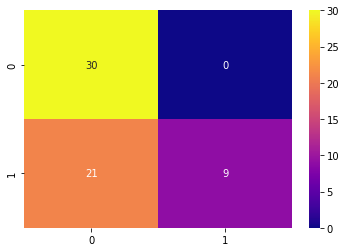

In [19]:
import seaborn as sns
sns.heatmap(cm, cmap = 'plasma', annot = True)